# Predicción de Glucosa en Sangre con Redes Neuronales (versión corregida)

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Carga y preprocesamiento de datos

In [64]:
# Cargar el dataset
df = pd.read_csv("diabetes.csv")

# Separar variables predictoras y objetivo
X = df.drop(columns=['Glucose'])
y = df['Glucose'].values.reshape(-1, 1)

# Normalizar X
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalizar y
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Convertir a tensores
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

## Definición del modelo

In [65]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X.shape[1], 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)
        self.out = nn.Linear(8, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.out(x)
        return x

model = NeuralNetwork()

## Entrenamiento del modelo

In [66]:
# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrenar
epochs = 300
loss_history = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/300, Loss: 1.0457
Epoch 20/300, Loss: 1.0030
Epoch 30/300, Loss: 0.9734
Epoch 40/300, Loss: 0.9489
Epoch 50/300, Loss: 0.9265
Epoch 60/300, Loss: 0.9050
Epoch 70/300, Loss: 0.8840
Epoch 80/300, Loss: 0.8639
Epoch 90/300, Loss: 0.8448
Epoch 100/300, Loss: 0.8268
Epoch 110/300, Loss: 0.8099
Epoch 120/300, Loss: 0.7941
Epoch 130/300, Loss: 0.7798
Epoch 140/300, Loss: 0.7669
Epoch 150/300, Loss: 0.7553
Epoch 160/300, Loss: 0.7449
Epoch 170/300, Loss: 0.7357
Epoch 180/300, Loss: 0.7278
Epoch 190/300, Loss: 0.7208
Epoch 200/300, Loss: 0.7147
Epoch 210/300, Loss: 0.7094
Epoch 220/300, Loss: 0.7048
Epoch 230/300, Loss: 0.7007
Epoch 240/300, Loss: 0.6969
Epoch 250/300, Loss: 0.6934
Epoch 260/300, Loss: 0.6902
Epoch 270/300, Loss: 0.6872
Epoch 280/300, Loss: 0.6843
Epoch 290/300, Loss: 0.6816
Epoch 300/300, Loss: 0.6791


## Evolución del error

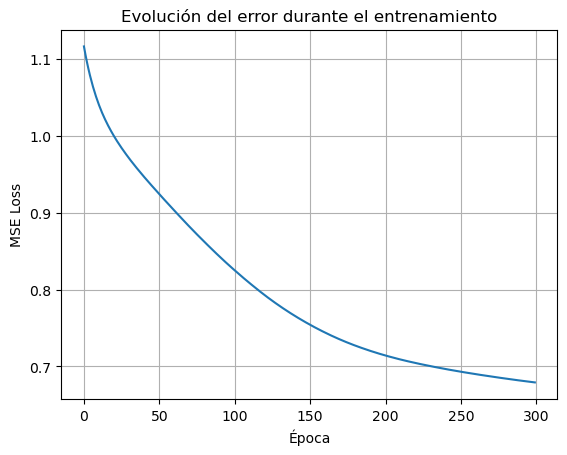

In [67]:
plt.plot(loss_history)
plt.title("Evolución del error durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

## Evaluación del modelo

In [68]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.6634


## Comparación valores reales vs. predichos

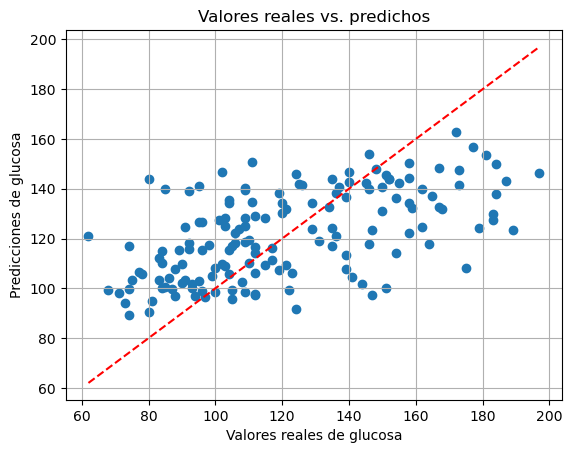

In [69]:
# Desnormalizar
y_test_orig = scaler_y.inverse_transform(y_test.numpy())
predictions_orig = scaler_y.inverse_transform(predictions.numpy())

plt.scatter(y_test_orig, predictions_orig)
plt.xlabel("Valores reales de glucosa")
plt.ylabel("Predicciones de glucosa")
plt.title("Valores reales vs. predichos")
plt.grid(True)
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.show()